<a href="https://colab.research.google.com/github/ahamedafzal/Mask_prediction/blob/main/Mask_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mask Prediction**

In [26]:
import pandas as pd
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize

In [27]:
os.listdir("/content/drive/MyDrive/Mask_data")

['with_mask', 'without_mask']

In [28]:
os.listdir("/content/drive/MyDrive/Maskdataset")

['with_mask', 'without_mask']

In [29]:
train_data="/content/drive/MyDrive/Mask_data"
X_train=[]
y_train=[]

In [30]:
categories=["without_mask","with_mask"]
for i in categories:
  path=os.path.join(train_data,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    # print(imgpath)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,3))
    X_train.append(img_resize)
    y_train.append(categories.index(i))
  print("Loaded",i)

Loaded without_mask


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded with_mask


In [31]:
len(y_train)

3150

In [32]:
test_data="/content/drive/MyDrive/Maskdataset"
X_test=[]
y_test=[]

In [33]:
for i in categories:
  patht=os.path.join(test_data,i)
  imagest=os.listdir(patht)
  for img in imagest:
    imgpatht=os.path.join(patht,img)
    img_arrayt=imread(imgpatht)
    img_resizet=resize(img_arrayt,(150,150,3))
    X_test.append(img_resizet)
    y_test.append(categories.index(i))
  print("Loaded",i)

Loaded without_mask
Loaded with_mask


In [34]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [35]:
X_train.shape

(3150, 150, 150, 3)

In [36]:
y_train.shape

(3150,)

In [37]:
X_test.shape

(102, 150, 150, 3)

In [38]:
y_test.shape

(102,)

**Modelling

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(32,(3,3),activation="relu"))
# model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [41]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
32/32 [==============================] - 67s 2s/step - loss: 1.7267 - accuracy: 0.7206
Epoch 2/10
32/32 [==============================] - 68s 2s/step - loss: 0.2475 - accuracy: 0.9076
Epoch 3/10
32/32 [==============================] - 66s 2s/step - loss: 0.1471 - accuracy: 0.9514
Epoch 4/10
32/32 [==============================] - 69s 2s/step - loss: 0.1055 - accuracy: 0.9673
Epoch 5/10
32/32 [==============================] - 65s 2s/step - loss: 0.0617 - accuracy: 0.9829
Epoch 6/10
32/32 [==============================] - 65s 2s/step - loss: 0.0417 - accuracy: 0.9908
Epoch 7/10
32/32 [==============================] - 67s 2s/step - loss: 0.0271 - accuracy: 0.9952
Epoch 8/10
32/32 [==============================] - 71s 2s/step - loss: 0.0184 - accuracy: 0.9978
Epoch 9/10
32/32 [==============================] - 65s 2s/step - loss: 0.0123 - accuracy: 0.9981
Epoch 10/10
32/32 [==============================] - 69s 2s/step - loss: 0.0075 - accuracy: 0.9990


In [43]:
loss,accuracy=model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 143ms/step - loss: 0.1774 - accuracy: 0.9608


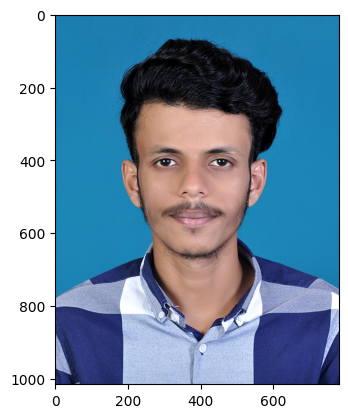

In [44]:
import matplotlib .pyplot as plt
img=imread("/content/drive/MyDrive/123629.jpg")
plt.imshow(img)

In [45]:
img=resize(img,(150,150,3))

In [46]:
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [47]:
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 79ms/step


array([[9.999207e-01, 7.928587e-05]], dtype=float32)

In [48]:
ind=y_new.argmax()
print(categories[ind])

without_mask


In [49]:
import pickle

In [50]:
filename="model_cnn.csv"
pickle.dump(model,open(filename,"wb"))